# Analyzing violent crime, workflow
## Workflow using Python ArcGIS


Connect your ArcGIS online organization.

In [194]:
from arcgis import *

In [195]:
gis = GIS("https://deldev.maps.arcgis.com", "demo_deldev", "P@ssword123")

Accessing the content property of your gis object you can use the `search()` method. 
Search for **CrimeAnalysisData** content made by other users by turning the **outside_org** to True.

In [196]:
items = gis.content.search('title:CrimeAnalysisData owner:lscott_ANGP', outside_org=True)

Importing the **display** module

In [197]:
from IPython.display import display

<Item title:"CrimeAnalysisData" type:Feature Layer Collection owner:lscott_ANGP>
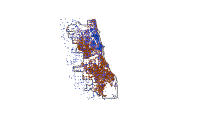

In [198]:
for item in items:
    display(item)

Getting the first item 

In [199]:
crime_item = items[0]

Since the item is a Feature Layer Collection, accessing the layers property will give us a list of FeatureLayer objects.

In [200]:
lyrs = crime_item.layers

The code below cycles through the layers and print their names.

In [201]:
for lyr in lyrs:
    print(lyr.properties.name)

Public High Schools
Liquor Vendors
Violent Crime 2014
Analysis Boundary


Getting the second layer and saving it in **violent_crimes**.

In [202]:
violent_crimes = lyrs[2]

In [203]:
violent_crimes

<FeatureLayer url:"https://services1.arcgis.com/hLJbHVT9ZrDIzK0I/arcgis/rest/services/CrimeAnalysisData/FeatureServer/2">

The GIS object includes a map widget for displaying geographic locations, visualizing GIS content, as well as the results of your analysis. To use the map widget, call gis.map() and assign it to a variable.

In [204]:
chicago_map = gis.map('Chicago')
chicago_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

![](images/map1.PNG)

## Analyzing patterns in featurte data
GIS has a set of tools to help you identify, quantify and visualize satial patterns in your data by identifying areas of statistically significant clusters. 
The  'find_hot_spots' tool allows you to visualize areas having significant clusters.

In [205]:
from arcgis.features.analyze_patterns import find_hot_spots

In [250]:
crime_hot_spots = find_hot_spots(violent_crimes, output_name='Crime_HotSpots')

In [251]:
crime_hot_spots

<Item title:"Crime_HotSpots" type:Feature Layer Collection owner:demo_deldev>

In [244]:
crime_spots_map = gis.map('Chicago')
crime_spots_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

In [245]:
crime_spots_map.add_layer({"type":"FeatureLayer", 
               "url":crime_hot_spots.layers[0].url,
               "definition_expression" : "Gi_Bin=3",
               
              })

![](images/map2.PNG)

You can add a number of different layer objects such as FeatureLayer, FeatureCollection, ImageryLayer, MapImageLayer to the map
by calling the add_layer() method.

In [222]:
crime_spots_map.add_layer(crime_hot_spots)

Getting the liquor_vendors layer from the lyrs item

In [210]:
liquor_vendors = lyrs[1]

Find hotspots for **liquor_vendors** layer

In [252]:
liquor_vendor_hot_spots = find_hot_spots(liquor_vendors,
                                         output_name='liquor_HotSpots')

In [253]:
liquor_vendor_hot_spots

<Item title:"liquor_HotSpots" type:Feature Layer Collection owner:demo_deldev>

visualizing **liquor_vendor_hot_spots** on map

In [235]:
liquor_hot_spots_map = gis.map('Chicago')
liquor_hot_spots_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

In [240]:
liquor_hot_spots_map.remove_layers(liquor_vendor_hot_spots)

In [ ]:
{"type":"FeatureLayer", 
               "url":liquor_vendor_hot_spots.layers[0].url,
               "definition_expression" : "Gi_Bin=3",
               
              }

![](images/map3.PNG)

### Enriching study areas
The enrich_layer tool gives you demographic and landascape data for the people, places, and businesses in a specific area, or within a selected travel time or distance from a location. 

In [215]:
from arcgis.features.enrich_data import enrich_layer

you can add analysis variables as a list variables you want to enrich your data with.

In [254]:
enriched_layer = enrich_layer(crime_hot_spots, 
                              analysis_variables=["households.ACSHHBPOV"], 
                              output_name='PovertyData')

In [255]:
enriched_layer

<Item title:"PovertyData" type:Feature Layer Collection owner:demo_deldev>

Loading map and visualizing

In [96]:
crime_enriched_map = gis.map('Chicago')
crime_enriched_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

In [100]:
crime_enriched_map.add_layer(enriched_layer)

![](images/map4.PNG)

You can find hot spots of the enriched layer keeping the parameter aalysis_field as the field from the analyisis variable.

In [263]:
poverty_data_hot_spots = find_hot_spots(enriched_layer, analysis_field='ACSHHBPOV',
                                         output_name='poverty_enriched_hotspots')

Load the map again to visualize the poverty_data_hot_spots

In [101]:
poverty_data_hot_spots_map = gis.map('Chicago')
poverty_data_hot_spots_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

In [102]:
poverty_data_hot_spots_map.add_layer(poverty_data_hot_spots)

![](images/map5.PNG)

Filter the crime_hot_spots,liquor_vendor_hot_spots, poverty_data_hot_spots by selecting only those places where the Gi_Bin attribute is 3 (this is the code for statistically significant hot spots at the 99 percent confidence level)

# TODO: This filter isn't working

In [256]:
crimelayer = crime_hot_spots.layers[0]
crimelayer.filter = "Gi_Bin = 3"

In [257]:
liquorlayer = liquor_vendor_hot_spots.layers[0]
liquorlayer.filter = "Gi_Bin = 3"

In [180]:
poverty_data_hot_spots.layers[0].filter = "Gi_Bin = 3"

# overlay_layers tool 
overlay_layers combines two or more layers into one single layer. You can think of overlay as peering through a stack of maps and creating a single map containing all the information found in the stack.
The Overlay Layers tool requires two inputs: an input layer and an overlay layer. 
Use Overlay Layers to combine two layers into a single layer using an intersect, union, or erase method. 

In [258]:
from arcgis.features.manage_data import overlay_layers

In [261]:
crime_hot_spots

<Item title:"Crime_HotSpots" type:Feature Layer Collection owner:demo_deldev>

In [230]:
crime_hot_spots.layers[0].filter

'Gi_Bin = 1'

In [259]:
intersect_of_crime_vendor = overlay_layers(crimelayer, liquorlayer, tolerance=0, context={},
                           output_name="intersect_of_crime_vendor")

In [260]:
intersect_of_crime_vendor

<Item title:"intersect_of_crime_vendor" type:Feature Layer Collection owner:demo_deldev>

In [301]:
intersected = overlay_layers(intersect_of_crime_vendor, poverty_data_hot_spots,
                             output_name="intersect_of_crime_vendor_poverty")

error return without exception set
{"messageCode": "AO_100013", "message": "OverlayLayers failed."}
Failed to execute (OverlayLayers).
Failed.


Exception: Job failed.

In [111]:
intersected

<Item title:"intersect_crime_vendor_poverty" type:Feature Layer Collection owner:demo_deldev>

Load the overlay layer on the map.

In [186]:
intersected_map = gis.map('Chicago')
intersected_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

In [114]:
intersected_map.add_layer(intersected)

![](images/map6.PNG)

Acsesing the content property of your gis use search() method to search for **ViolentCrimeTrend** feature layer collection outside organization.

In [264]:
crime_trend = gis.content.search('title:ViolentCrimeTrend owner:lscott_ANGP', outside_org=True)

Display the items of the contents searchd.

<Item title:"ViolentCrimeTrends" type:Feature Layer Collection owner:lscott_ANGP>
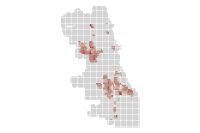

In [265]:
for item in crime_trend:
    display(item)

Get the first item from crime_trend. 

In [266]:
crime_trend_item = crime_trend[0]

<Item title:"ViolentCrimeTrends" type:Feature Layer Collection owner:lscott_ANGP>
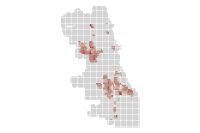

In [267]:
crime_trend_item

Assign a variable name **crime_trend_layer** to the first layer from the features layer collection .

In [287]:
crime_trend_layer = crime_trend_item.layers[0]

Load and visualize the crime_trend_layer on map.

In [288]:
crime_trends_map = gis.map('Chicago')
crime_trends_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

In [290]:
crime_trend_layer.filter = "(PATTERN = 'Consecutive Hot Spot') OR (PATTERN = 'Intensifying Hot Spot') OR (PATTERN = 'Persistent Hot Spot')"

In [291]:
crime_trends_map.add_layer(crime_trend_layer)

![](images/map7.PNG)

Publish a layer

Use the enrich_layer tool to add more demographic information to the layer.

In [271]:
crime_trend_enriched_unemployment = enrich_layer(crime_trend_layer, 
                              analysis_variables=["industry.UNEMPRT_CY"], 
                              output_name='UnemploymentLayer')

Use find_hot_spots tool to spot hot spots of **cime_trend_enriched_unemployment** layer.

In [292]:
unemployment_rate_hot_spots = find_hot_spots(crime_trend_enriched_unemployment,
                                             analysis_field='UNEMPRT_CY',
                                         output_name='unemployment rate hotspots')

Load and visualize hot spots on map.

In [132]:
unemployment_rate_hot_spots_map = gis.map('Chicago')
unemployment_rate_hot_spots_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

In [133]:
unemployment_rate_hot_spots_map.add_layer(unemployment_rate_hot_spots)

![](images/map8.PNG)

filter unemployment_rate_hot_spots to select locations where the Gi_Bin Fixed 4554_FDR field is 3 (this is the code for statistically significant hot spots at the 99 percent confidence level).
Filter the most intense unemployment hot spots

In [293]:
unemployment_rate_hot_spots.layers[0].filter = "Gi_Bin = 3"

For the crime trends map, you are interested in specific Pattern Type values: Intensifying, Consecutive, and Persistent hot spots. 

In [294]:
crime_trend_layer.filter = "(PATTERN = 'Consecutive Hot Spot') OR (PATTERN = 'Intensifying Hot Spot') OR (PATTERN = 'Persistent Hot Spot')"

Use overlay_layers tool to find areas that are common to crime trend layer and unemployment_rate_hot_spots.

In [295]:
overlay = overlay_layers(crime_trend_layer, unemployment_rate_hot_spots,
                         output_name="overlay_unemployment_crimetrend")

In [296]:
overlay

<Item title:"overlay_unemployment_crimetrend" type:Feature Layer Collection owner:demo_deldev>

Load and visualize on map.

In [297]:
overlay_map = gis.map('Chicago')
overlay_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

In [298]:
overlay_map.add_layer(overlay)

![](images/map_9.PNG)

Getting the first layer and saving it in **public_high_school_layer**.

In [272]:
public_high_school_layer = lyrs[0]

In [273]:
from arcgis.features.find_locations import find_existing_locations 

In [274]:
cime_trend_enriched_unemployment.share(True)

{'itemId': '95bfada660b9491bad7f8bf40f82140b', 'notSharedWith': []}

In [275]:
public_high_school_layer.url

'https://services1.arcgis.com/hLJbHVT9ZrDIzK0I/arcgis/rest/services/CrimeAnalysisData/FeatureServer/0'

In [ ]:
[{"operator":"","layer":0,"selectingLayer":1,"spatialRel":"withinDistance","distance":0.25,"units":"Miles"}]

In [279]:
nearby_schools = find_existing_locations(input_layers=[ {'url': public_high_school_layer.url},
                                                       {'url': cime_trend_enriched_unemployment.layers[0].url}], 
                        expressions=[{"operator":"","layer":0,"selectingLayer":1,"spatialRel":"withinDistance",
                                      "distance":0.25,"units":"Miles"}], output_name='nearby_schools_2')

In [282]:
nearby_schools

<Item title:"nearby_schools_2" type:Feature Layer Collection owner:demo_deldev>

In [284]:
selected_high_schools_map = gis.map('Chicago')
selected_high_schools_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

In [285]:
selected_high_schools_map.add_layer(nearby_schools)

![](images/map10.PNG) #not saved yet